<a href="https://colab.research.google.com/github/Pogeyann/Machine-Learning/blob/main/Telecom_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Churn Prediction

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
sns.set(style='white')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
telecom_cust = pd.read_csv('/content/drive/MyDrive/DS/Machine_Learning/projects/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [4]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df = telecom_cust

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Checking the datatypes of all the columns

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# converting the total charges to a numerical datatypes
df['TotalCharges'] = df['TotalCharges'].str.replace(' ','')
df['TotalCharges'] = df['TotalCharges'].str.replace('','0')
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.loc[df['TotalCharges'] == 0, 'TotalCharges'] = np.NaN

In [10]:
Totalcharges_mean = np.mean(df['TotalCharges'])
df['TotalCharges'] = df['TotalCharges'].fillna(Totalcharges_mean)


In [11]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# remove customer id from the dataset

df1 = df.iloc[:,1:]


In [13]:
# Converting the predictor variable in a binary numeric variable

df1['Churn'].replace(to_replace='Yes',value=1,inplace=True)
df1['Churn'].replace(to_replace='No',value=0,inplace=True)

In [14]:
# let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df1)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,2.090081e+03,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1.080809e+07,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,1.000800e+05,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1.080400e+07,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,1.050101e+05,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<Axes: >

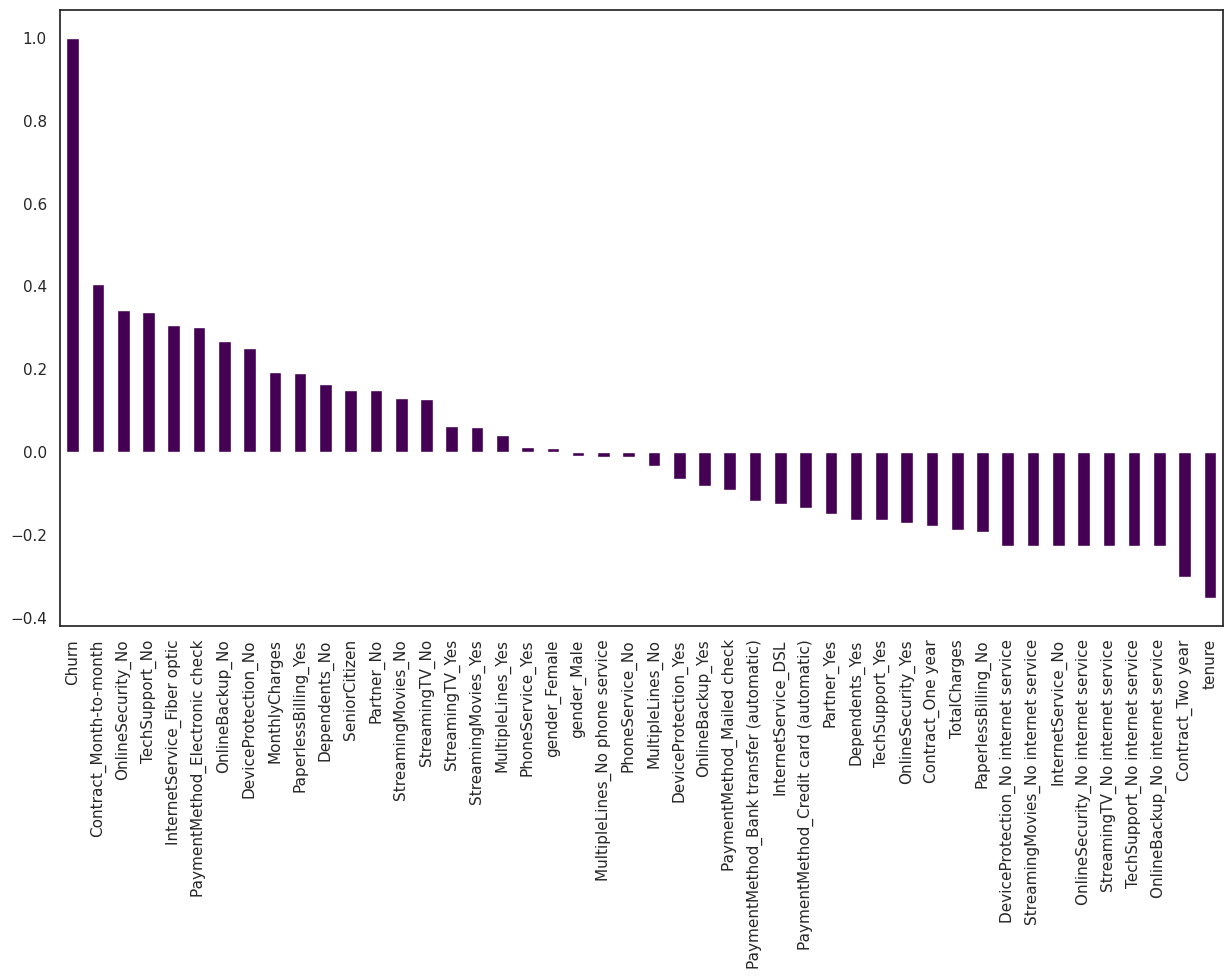

In [15]:
# Get correlation of 'Churn' with other variables

plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',cmap='viridis')

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. while tenur two year contracts seem to be negatively correlated with churn.

Interestingly services such as online security, streaming tv, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

we will explore the pattern for the above correlations below before we dive into modelling and identifying the important variables


**Data Exploration**

---

A. *Demographics*

1. Gender Distribution


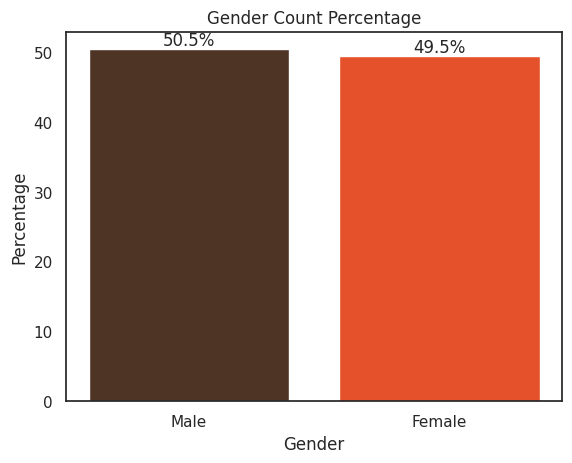

In [16]:
gender_count = df['gender'].value_counts()
gender_pct = gender_count / gender_count.sum() * 100

# Plot the bar chart
colors = ['#4D3425','#E4512B']
fig, ax = plt.subplots()
bars = ax.bar(gender_pct.index, gender_pct.values,color = colors)

# Add the percentage values to the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f"{gender_pct[i]:.1f}%", ha='center', va='bottom')

# Set the plot title and axis labels
plt.title('Gender Count Percentage')
plt.xlabel('Gender')
plt.ylabel('Percentage')

# Show the plot
plt.show()

2. Percentage of Senior citizens

Text(0.5, 1.0, '% of Senior citizens')

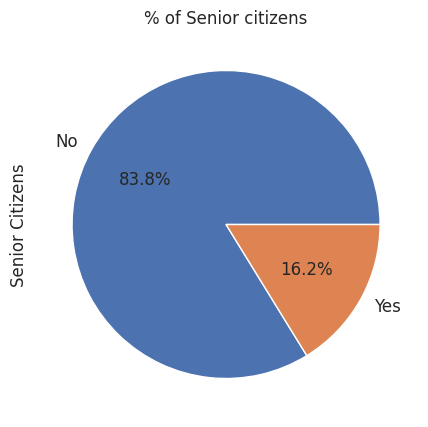

In [17]:
senior_count = df['SeniorCitizen'].value_counts()
senior_pct = senior_count*100/senior_count.sum()
ax = senior_pct.plot(kind='pie', autopct='%.1f%%', labels= ['No', 'Yes'],figsize =(5,5),fontsize= 12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens', fontsize =12)
ax.set_title('% of Senior citizens', fontsize= 12)




3. Partner and Dependent status.
about 50% of the customers have a partner, while only 30% of the total customers have dependents.


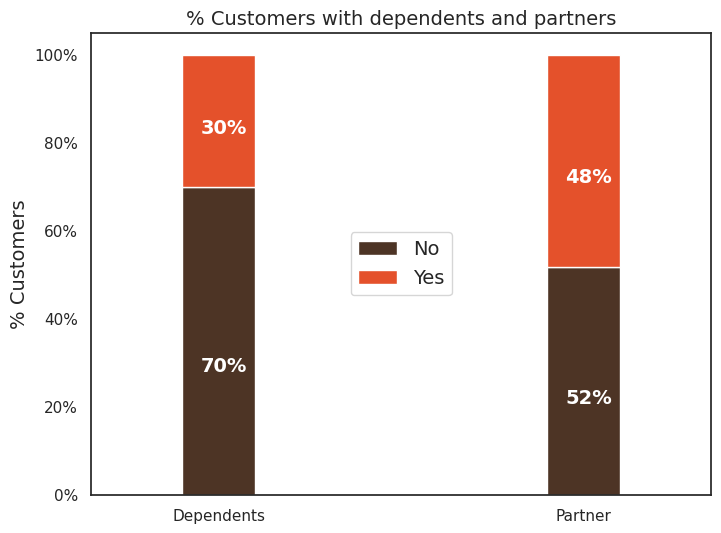

In [18]:

df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
# Melt : to Transform the original dataframe into new dataframe.
# id vars specifies which column should be used as an identifier for each
df3 = df2.groupby(['variable','value']).count().unstack()

df3 = df3*100/len(telecom_cust)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

<ipython-input-19-d625663cf7ab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['tenure'],bins=int(180/5),hist=True,kde=False)


Text(0.5, 1.0, '# of Customers by their tenure')

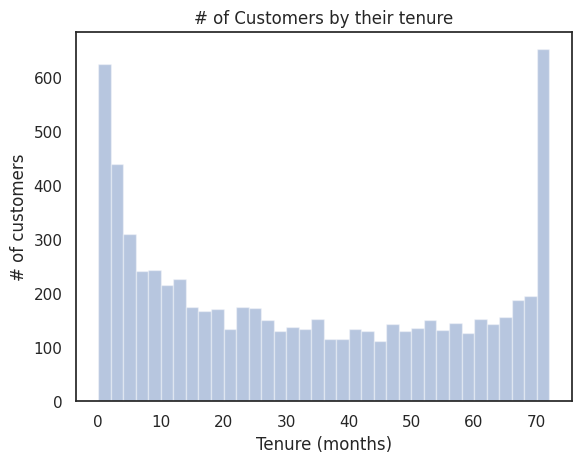

In [19]:
ax = sns.distplot(df['tenure'],bins=int(180/5),hist=True,kde=False)
ax.set_ylabel('# of customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of customers by contract type')

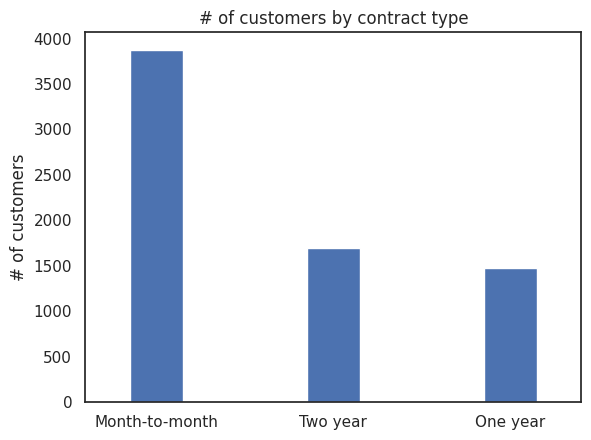

In [20]:
ax = df['Contract'].value_counts().plot(kind='bar',rot=0,width=0.3)
ax.set_ylabel('# of customers')
ax.set_title('# of customers by contract type')


As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

Below we will understand the tenure of customers based on their contract type.

i.) Churn vs Tenure

as we can see form the below plot , the customers who do not churn ,they tend to stay for a longer tenure with telecom company.

<Axes: xlabel='Churn', ylabel='tenure'>

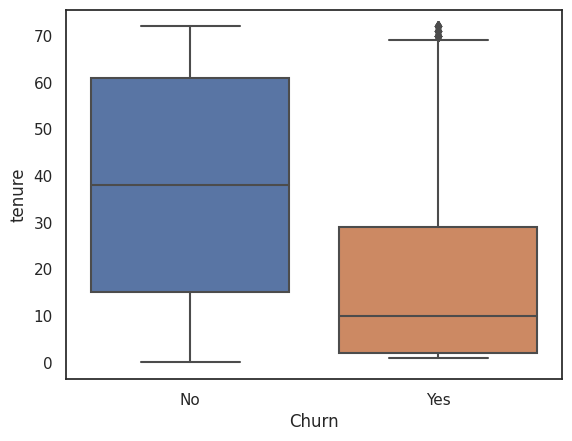

In [21]:
sns.boxplot(x = df.Churn, y= df.tenure)

**Churn by Monthly charges**: Higher % of customers churn when the monthly charges are high

<ipython-input-22-a2c833a92816>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.MonthlyCharges[(df['Churn'] == 'No') ], color='Red', shade= True)
<ipython-input-22-a2c833a92816>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df['MonthlyCharges'][(df['Churn'] == 'Yes')],


Text(0.5, 1.0, 'Distribution of monthly charges by Churn')

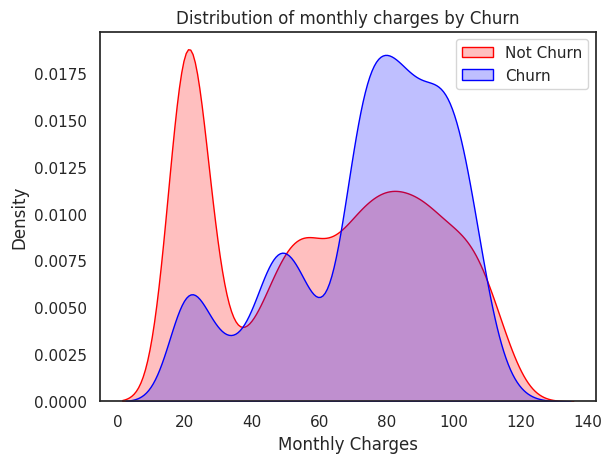

In [22]:
ax = sns.kdeplot(df.MonthlyCharges[(df['Churn'] == 'No') ], color='Red', shade= True)
ax = sns.kdeplot(df['MonthlyCharges'][(df['Churn'] == 'Yes')],
                 ax = ax, color='Blue', shade=True)
ax.legend(['Not Churn','Churn'],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by Churn')


Churn by Total Charges: It seems that there is higher churn when the total charges are lower

<ipython-input-23-4e5e0f295d4a>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df['TotalCharges'][(df['Churn'] == 'No')],
<ipython-input-23-4e5e0f295d4a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df['TotalCharges'][(df['Churn'] == 'Yes')],


Text(0.5, 1.0, 'Distribution of total charges by churn')

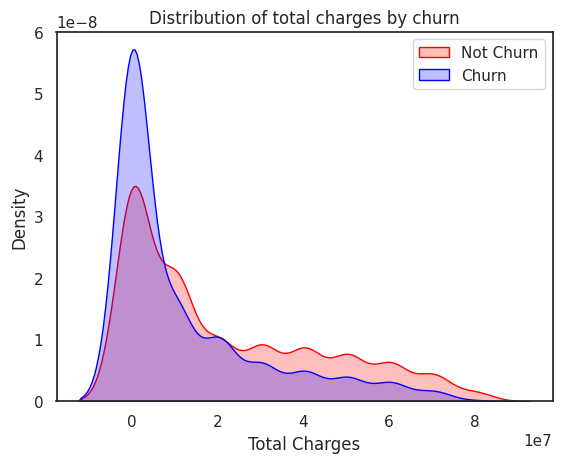

In [23]:
ax = sns.kdeplot(df['TotalCharges'][(df['Churn'] == 'No')],
                                    color='Red', shade= True)
ax = sns.kdeplot(df['TotalCharges'][(df['Churn'] == 'Yes')],
                 ax = ax, color='Blue', shade= True)
ax.legend(['Not Churn', 'Churn'],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

<Axes: >

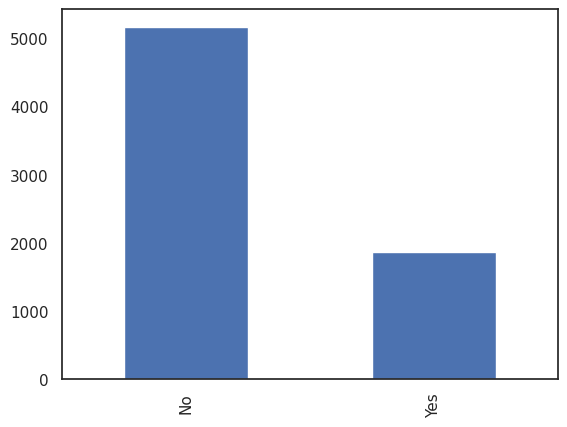

In [24]:
df['Churn'].value_counts().plot(kind='bar')

**Splitting the datasets**
 

In [25]:
y = df_dummies['Churn'].values
x = df_dummies.drop(columns = ['Churn'])

# scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
x = pd.DataFrame(scaler.fit_transform(x))
x.columns = features


It is important to scale the variables in logistic regression so that all of them are within a range of 0 to 1. This helped me improve the accuracy from 79.7 to 80.7%. Further, you will notice below that the importance of variables is also aligned with we are seeing in Random Forest algorithm and the EDA we conducted above.

In [26]:
# Create Train and test data
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)


***Hyper Parameter Tuning***

---

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(x_train, y_train)
print(grid.best_params_)

{'C': 1, 'gamma': 0.1}


***Logistic Regression***

---

In [28]:
# Running Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(x_train,y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn import metrics 
prediction_test =  model.predict(x_test)
# Print the prediction accuracy
print(metrics.accuracy_score(y_test, prediction_test))

0.8140085186938003


In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [31]:
rf_report = classification_report(y_test,prediction_test)
print(rf_report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1539
           1       0.69      0.57      0.63       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113



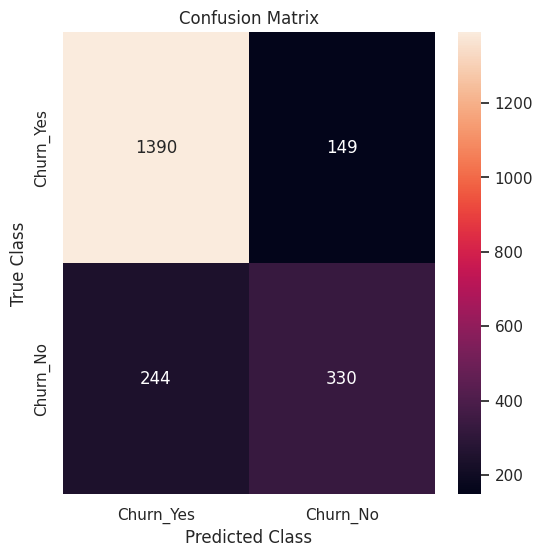

In [32]:
con = confusion_matrix(y_test,prediction_test)
labels = ['Churn_Yes','Churn_No']
plt.figure(figsize=(6,6))
sns.heatmap(con,xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Axes(0.125,0.11;0.775x0.77)


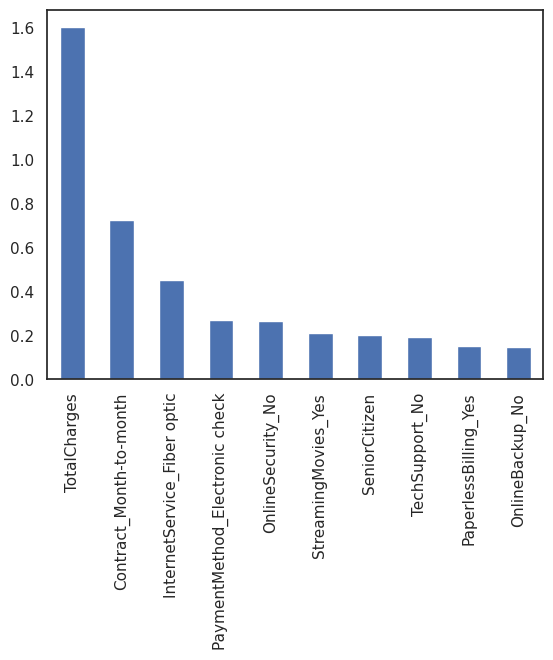

In [33]:
# To get the weights of all the variables

weights = pd.Series(model.coef_[0],
                    index= x.columns.values)
print(weights.sort_values(ascending= False)[:10].plot(kind='bar'))

**Observations**

---
We can see that some variables have a negative relation to our predicted variable(CHurn),while some have positive relation.Negative relation means that likeliness of churn decreases with that variable.Let us summarize some of the interesting features below:
* As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
* Having DSL internet service also reduces the probability of Churn
* Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. I think we need to explore more to better understad why this is happening.
Any hypothesis on the above would be really helpful!

***XG Boost***

---

In [34]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
preds = model.predict(x_test)
metrics.accuracy_score(y_test,preds)


0.7931850449597728

***ADA Boost***

---

In [35]:
# ADAboost algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50(default value)
# base_estimator = DecisionTreeClassifier (default value)
model.fit(x_train,y_train)
preds = model.predict(x_test)
metrics.accuracy_score(y_test, preds)

0.8012304779933743

***SVM***

---

In [37]:
from sklearn.svm import SVC
model = SVC(C=1,gamma=0.1)
model.fit(x_train,y_train)
preds = model.predict(x_test)
metrics.accuracy_score(y_test, preds)

0.7979176526265973